# Thông Tin
1. MSSV: 20520079
2. Họ và tên: Nguyễn Tư Thành Nhân
3. Bài tập: Bài tập 6
4. Ngày thực hiện: 05/05/2022


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap6/images

/content/drive/.shortcut-targets-by-id/13C37EedUSDnRymGA5rWpsqcry8w0txyr/CS231.M21.KHTN/Baitap/Baitap6/images


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [7]:
def GraphSeg(path_filename, x, y, w, h):
    img = cv2.imread(path_filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_copy = img.copy()
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 192, 203), thickness = 2)
    plt.imshow(img_copy)
    plt.show()
    print(img.shape)

    mask = np.zeros(img.shape[:2], np.uint8)
    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)
    rectangle = (x, y, w, h)
    cv2.grabCut(img, mask, rectangle,
                backgroundModel, foregroundModel,
                5, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    res = img * mask2[:, :, np.newaxis]
    plt.imshow(res)
    plt.show()
    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

## Lionel-Messi.jpg

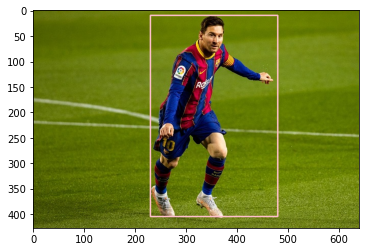

(427, 640, 3)


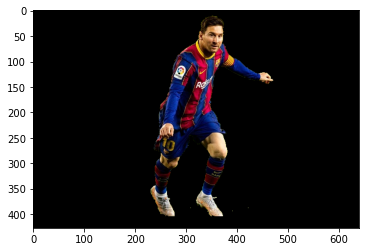

In [10]:
GraphSeg('Lionel-Messi.jpg', 230, 10, 250, 394)

## dogcat.jpg

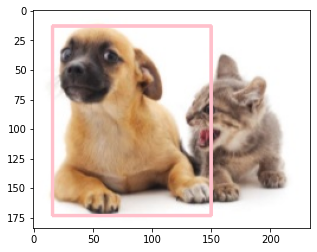

(184, 234, 3)


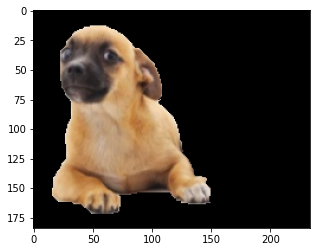

In [13]:
GraphSeg('dogcat.jpg', 16, 13, 134, 160)

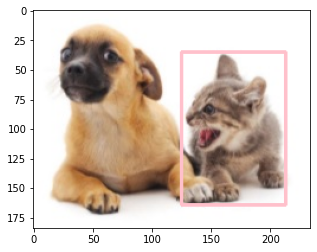

(184, 234, 3)


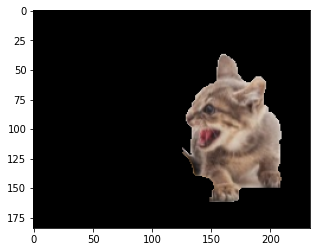

In [28]:
GraphSeg('dogcat.jpg', 125, 35, 88, 129)

## camourflage_00012.jpg

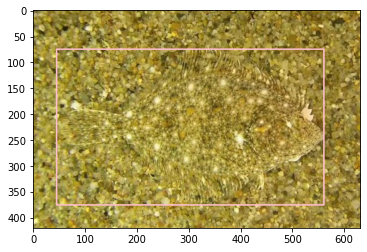

(420, 632, 3)


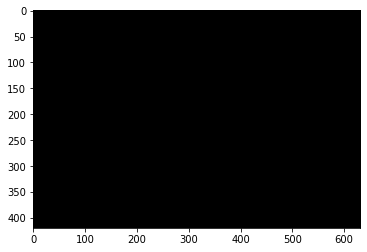

In [43]:
GraphSeg('camourflage_00012.jpg', 45, 75, 515, 300)

## camourflage_00129.jpg

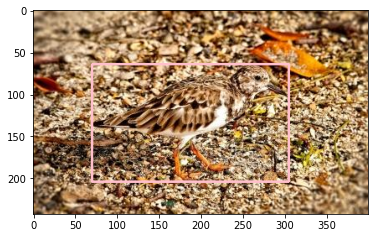

(243, 400, 3)


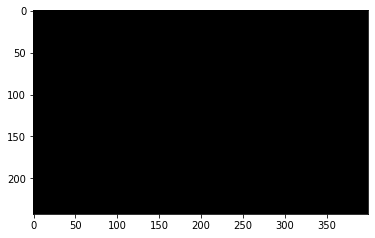

In [33]:
GraphSeg('camourflage_00129.jpg', 70, 64, 235, 140)